<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *7*: *Imbalanced Classification & NN***

###**Tenggat Waktu: 3 Desember 2023, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: A_Lab7_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **XX Bulan 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [12]:
# Isi dengan data diri Anda
NAMA = "Alvaro Austin"
KELAS = "B"
NPM = "2106752180"
NAMA_KELOMPOK_KAGGLE = "AlvaroAustin"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [13]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Alvaro Austin dari kelas B dengan NPM 2106752180, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Alvaro Austin)


In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from collections import Counter
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from numpy import where
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score

# Imbalanced Classification

Imbalanced classification adalah kondisi dalam masalah klasifikasi di mana distribusi kelas pada dataset tidak seimbang. Tingkat ketidakseimbangan tersebut dapat dikategorikan ke dalam 2 jenis, yaitu:

- Slight imbalance: yaitu ketidakseimbangan dengan tingkat rendah, seperti 4:6.
- Severe imbalance: yaitu ketidakseimbangan dengan tingkat yang sangat tinggi, seperti 1:100, 1:1000, ataupun lebih.

Kondisi distribusi kelas yang tidak seimbang pada dataset dapat mengakibatkan sejumlah kesalahan yang signifikan dalam proses pengklasifikasian kelas minoritas. Kelas minoritas akan sulit untuk diprediksi karena jumlah data yang mewakili kelas tersebut sangat sedikit dibandingkan dengan kelas mayoritas. Kondisi data yang tidak seimbang ini dapat menyebabkan bias dalam model klasifikasi, di mana model lebih cenderung memfokuskan pembelajaran pada karakteristik data dari kelas mayoritas sementara mengabaikan kelas minoritas.

Mengingat ini merupakan hal yang cukup umum, untuk mengatasi masalah ketidakseimbangan kelas, terdapat dua pendekatan utama yang dapat digunakan untuk mengambil sampel ulang dataset pelatihan:

- Oversampling: dalam pendekatan ini, kita menggandakan sampel dari kelas minoritas.
- Undersampling: dalam pendekatan ini, kita menghapus beberapa sampel dari kelas mayoritas untuk mencapai keseimbangan.

Dengan menggunakan fungsi `make_classification` dari library `scikit-learn`, kita dapat mensimulasikan dataset yang imbalance. Berikut merupakan contoh suatu dataset yang slight imbalance.

In [15]:
# Membuat dataset
X, y = make_classification(
    n_samples=10000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.6],
    flip_y=0,
    random_state=4
)

# Melihat distribusi kelas pada dataset
counter_y = Counter(y)
print(counter_y)

Counter({0: 6000, 1: 4000})


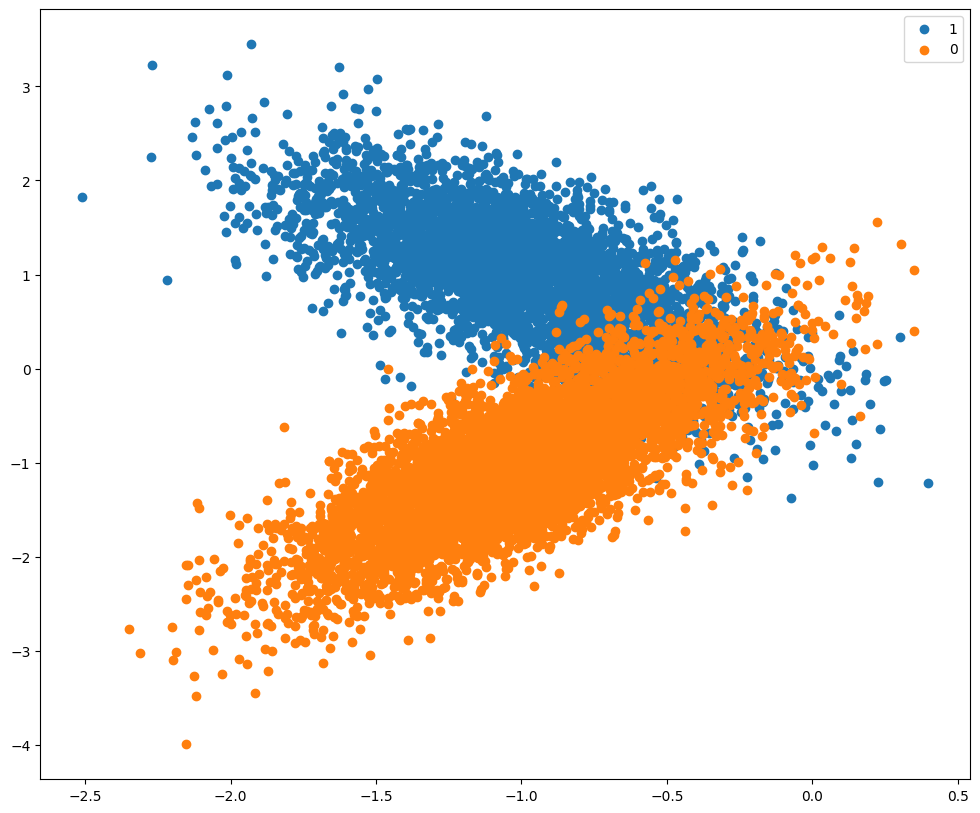

In [16]:
# Scatter plot dataset
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
  pyplot.legend()
pyplot.show()

Dapat dilihat bahwa kelas minoritas (warna biru) memiliki jumlah yang tidak terlalu berbeda jauh jika dibandingkan dengan kelas mayoritas (warna oranye). Selanjutnya, kita akan melihat contoh dataset yang severe imbalance dengan perbandingan 99:1.

In [17]:
# Membuat dataset
X, y = make_classification(
    n_samples=10000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.99],
    flip_y=0,
    random_state=4
)

# Melihat distribusi kelas pada dataset
counter_y = Counter(y)
print(counter_y)

Counter({0: 9900, 1: 100})


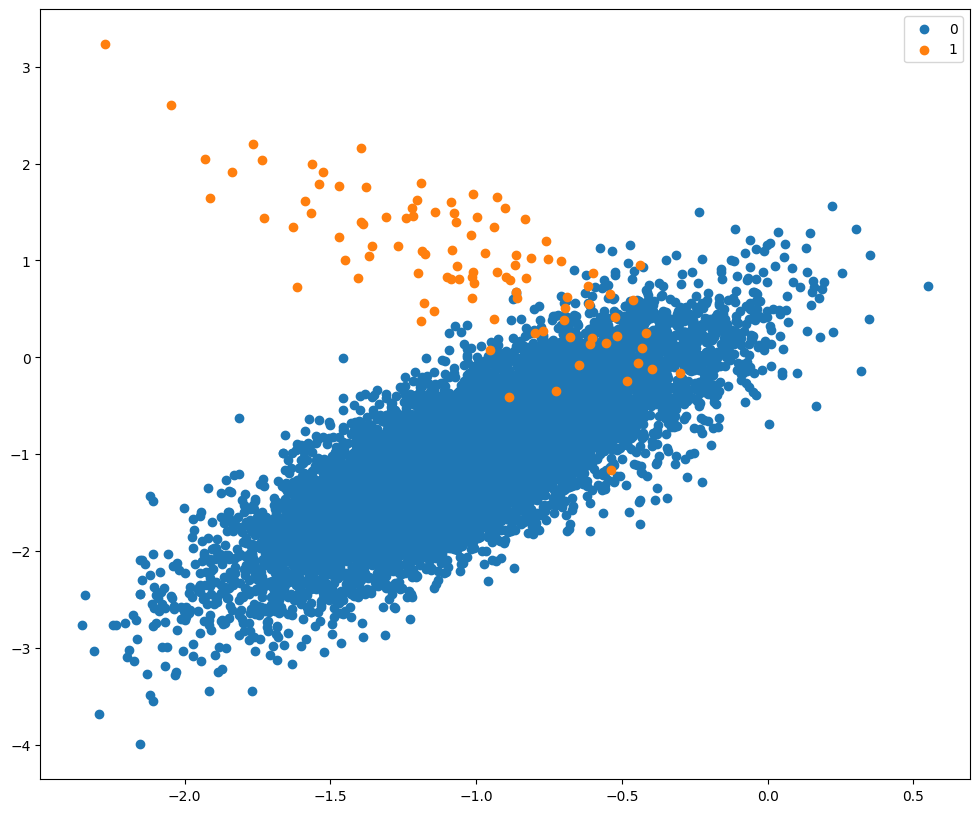

In [18]:
# Scatter plot dataset
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
  pyplot.legend()
pyplot.show()

Terlihat jelas bahwa kelas minoritas (warna oranye) memiliki jumlah yang sangat sedikit jika dibandingkan dengan kelas mayoritas (warna biru). Dataset ini yang akan digunakan untuk menerapkan metode oversampling dan undersampling.

## Oversampling

Oversampling adalah teknik yang digunakan untuk **meningkatkan jumlah data kelas minoritas**. Dengan demikian, model klasifikasi dapat lebih mendalami karakteristik dari data minoritas. Terdapat beberapa metode dalam menerapkan oversampling, antara lain:

- Random Oversampling,
- Synthetic Minority Oversampling Technique (SMOTE),
- Borderline-SMOTE,
- Borderline Oversampling with SVM, dan
- Adaptive Synthetic Sampling (ADASYN).

Penjelasan konsep dari kelima teknik ini dapat ditemukan di dalam materi perkuliahan serta sumber-sumber yang tersedia di internet.

### Random Oversampling

Melakukan pengambilan sampel acak dari kelas minoritas dan menggandakannya dalam dataset.

In [19]:
# Inisiasi oversampler dengan metode Random Oversampling
rand_over = RandomOverSampler(
    sampling_strategy='minority'
)

# Melakukan resampling
X_rand_over, y_rand_over = rand_over.fit_resample(X, y)

# Melihat distribusi kelas pada dataset
counter_y_rand_over = Counter(y_rand_over)
print(counter_y_rand_over)

Counter({0: 9900, 1: 9900})


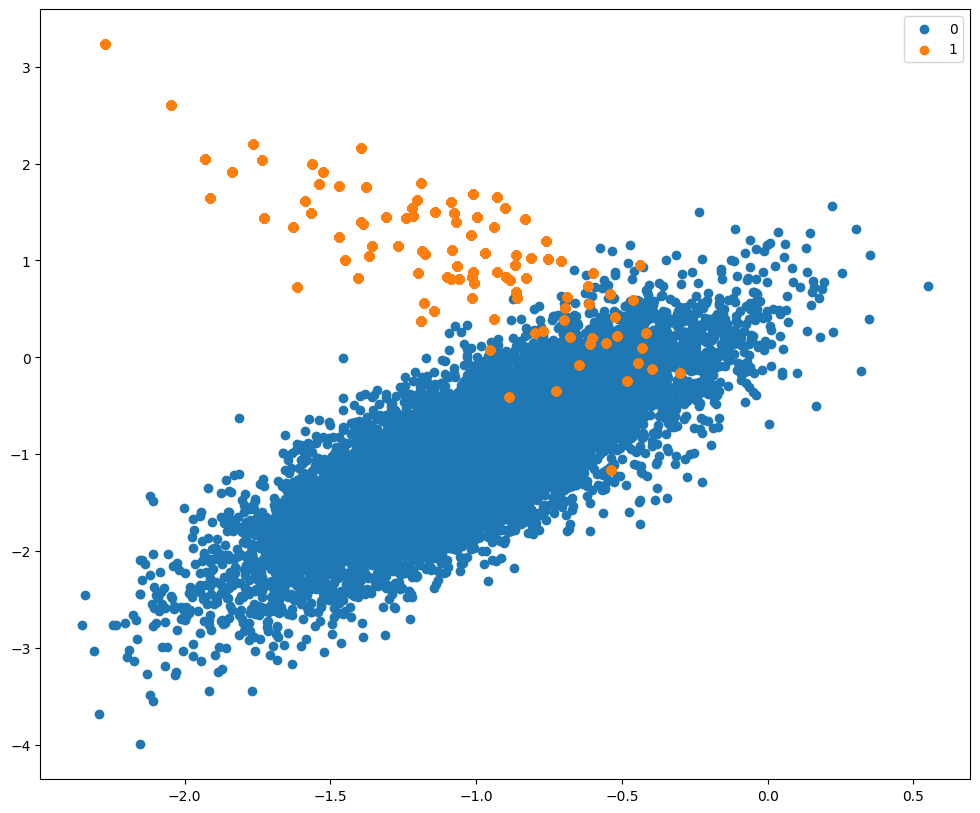

In [20]:
# Scatter plot dataset
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_rand_over.items():
  row_ix = where(y_rand_over == label)[0]
  pyplot.scatter(X_rand_over[row_ix, 0], X_rand_over[row_ix, 1], label=str(label))
  pyplot.legend()
pyplot.show()

### Synthetic Minority Oversampling Technique (SMOTE)

Membentuk sampel kelas minoritas tambahan dengan menggabungkan dan menghasilkan data sintetis berdasarkan sampel-sampel kelas minoritas yang telah ada.

In [21]:
# Inisiasi oversampler dengan metode SMOTE
smote = SMOTE()

# Melakukan resampling
X_smote, y_smote = smote.fit_resample(X, y)

# Melihat distribusi kelas pada dataset
counter_y_smote = Counter(y_smote)
print(counter_y_smote)

Counter({0: 9900, 1: 9900})


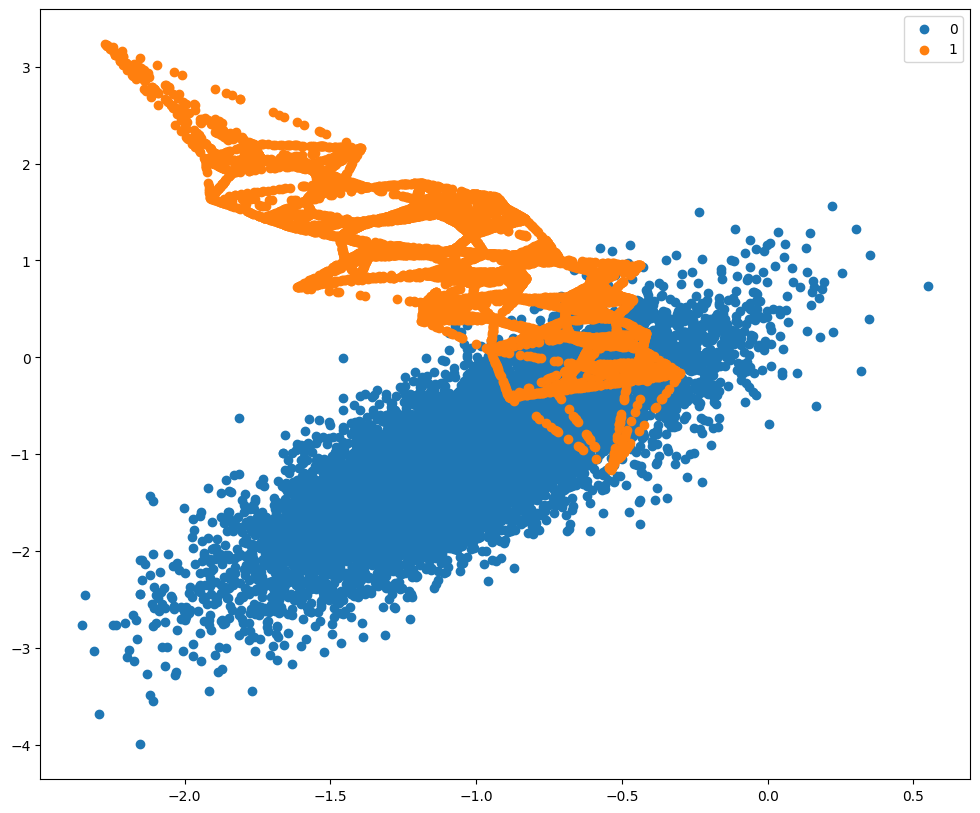

In [22]:
# Scatter plot dataset
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_smote.items():
  row_ix = where(y_smote == label)[0]
  pyplot.scatter(X_smote[row_ix, 0], X_smote[row_ix, 1], label=str(label))
  pyplot.legend()
pyplot.show()

### Borderline SMOTE

Suatu variasi (ekstensi) dari metode SMOTE. Pada Borderline-SMOTE, data sintetis dibuat secara selektif di sepanjang decision boundary antara dua kelas. Metode ini melibatkan pemilihan sampel dari kelas minoritas yang salah diklasifikasikan, misalnya, menggunakan model klasifikasi k-nearest neighbor (KNN).

In [23]:
# Inisiasi oversampler dengan metode Borderline SMOTE
borderline_smote = BorderlineSMOTE()

# Melakukan resampling
X_borderline_smote, y_borderline_smote = borderline_smote.fit_resample(X, y)

# Melihat distribusi kelas pada dataset
counter_y_borderline_smote = Counter(y_borderline_smote)
print(counter_y_borderline_smote)

Counter({0: 9900, 1: 9900})


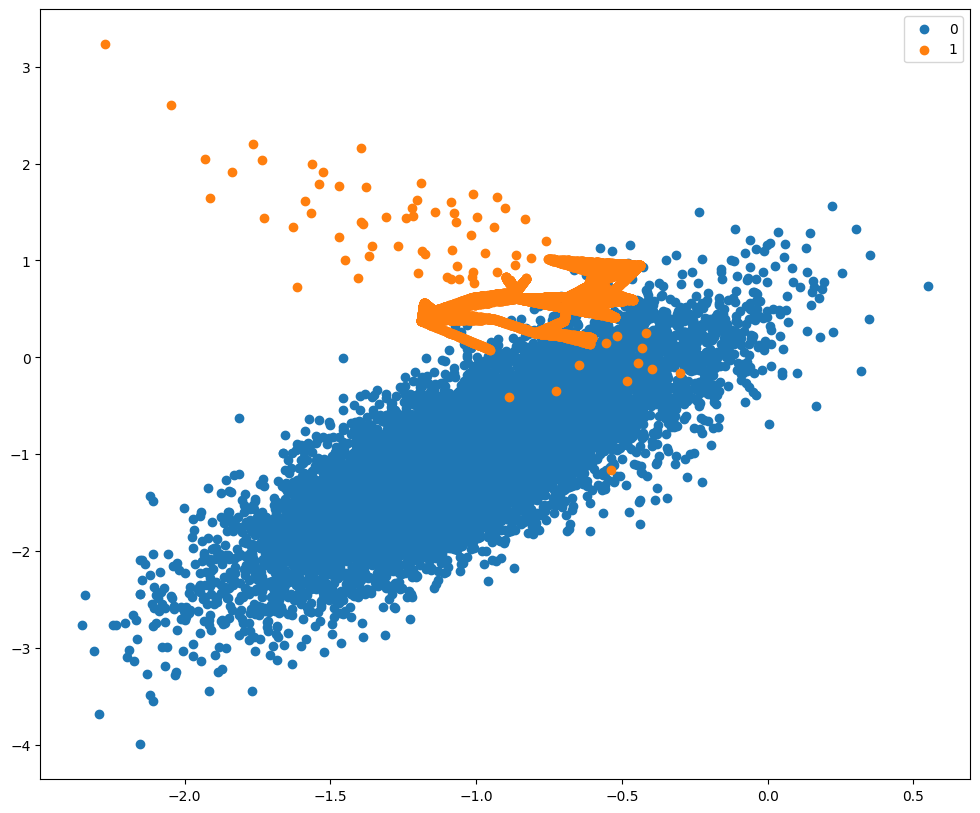

In [24]:
# Scatter plot dataset
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_borderline_smote.items():
  row_ix = where(y_borderline_smote == label)[0]
  pyplot.scatter(X_borderline_smote[row_ix, 0], X_borderline_smote[row_ix, 1], label=str(label))
  pyplot.legend()
pyplot.show()

### Borderline Oversampling with SVM

Merupakan variasi dari metode Borderline-SMOTE yang menggunakan algoritma SVM untuk mengidentifikasi sampel yang salah klasifikasi di sekitar decision boundary antara dua kelas.

In [25]:
# Inisiasi oversampler dengan metode Borderline SMOTE dengan SVM
svm_smote = SVMSMOTE()

# Melakukan resampling
X_svm_smote, y_svm_smote = svm_smote.fit_resample(X, y)

# Melihat distribusi kelas pada dataset
counter_y_svm_smote = Counter(y_svm_smote)
print(counter_y_svm_smote)

Counter({0: 9900, 1: 9900})


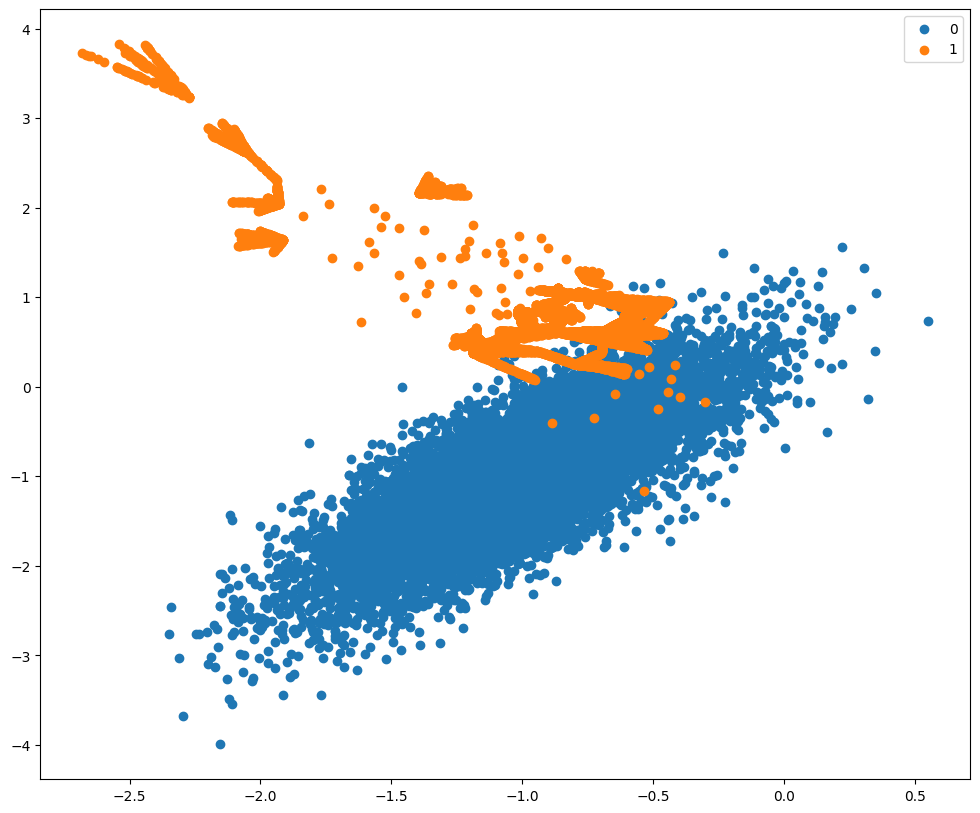

In [26]:
# Scatter plot dataset
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_svm_smote.items():
  row_ix = where(y_svm_smote == label)[0]
  pyplot.scatter(X_svm_smote[row_ix, 0], X_svm_smote[row_ix, 1], label=str(label))
  pyplot.legend()
pyplot.show()

### Adaptive Synthetic Sampling (ADASYN)

Secara adaptif menciptakan sampel-sampel tambahan untuk kelas minoritas berdasarkan distribusi mereka. Artinya, lebih banyak data sintetis akan dibuat untuk sampel-sampel kelas minoritas yang sulit untuk dipelajari oleh model dibandingkan dengan sampel-sampel minoritas yang lebih mudah dipelajari. Dengan kata lain, metode ini membantu model memahami lebih baik karakteristik dari kelas minoritas dengan cara menghasilkan lebih banyak data sintetis untuk kasus-kasus yang lebih sulit.

In [27]:
# Inisiasi oversampler dengan metode ADASYN
adasyn = ADASYN()

# Melakukan resampling
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

# Melihat distribusi kelas pada dataset
counter_y_adasyn = Counter(y_adasyn)
print(counter_y_adasyn)

Counter({1: 9907, 0: 9900})


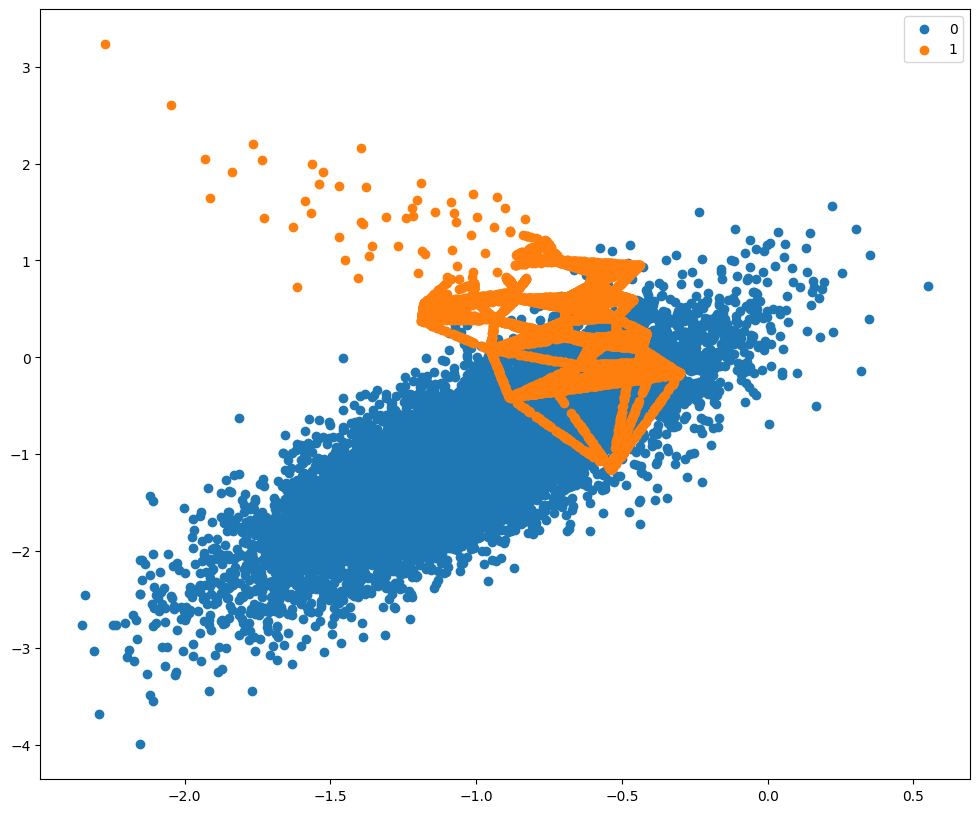

In [28]:
# Scatter plot dataset
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_adasyn.items():
  row_ix = where(y_adasyn == label)[0]
  pyplot.scatter(X_adasyn[row_ix, 0], X_adasyn[row_ix, 1], label=str(label))
  pyplot.legend()
pyplot.show()

## Undersampling

Berlawanan dengan oversampling, undersampling adalah teknik untuk **mengurangi jumlah data mayoritas**. Terdapat berbagai teknik untuk menerapkan undersampling, antara lain:

- Random Undersampling,
- Near Miss Undersampling, dan
- Tomek Link

Penjelasan konsep dari keempat teknik ini dapat ditemukan di dalam materi perkuliahan serta sumber-sumber yang tersedia di internet.

### Random Undersampling

Melakukan pengambilan sampel acak dari kelas mayoritas dan menghapusnya dalam dataset.

In [29]:
# Inisiasi undersampler dengan metode Random Undersampling
rand_under = RandomUnderSampler(
    sampling_strategy='majority'
)

# Melakukan resampling
X_rand_under, y_rand_under = rand_under.fit_resample(X, y)

# Melihat distribusi kelas pada dataset
counter_y_rand_under = Counter(y_rand_under)
print(counter_y_rand_under)

Counter({0: 100, 1: 100})


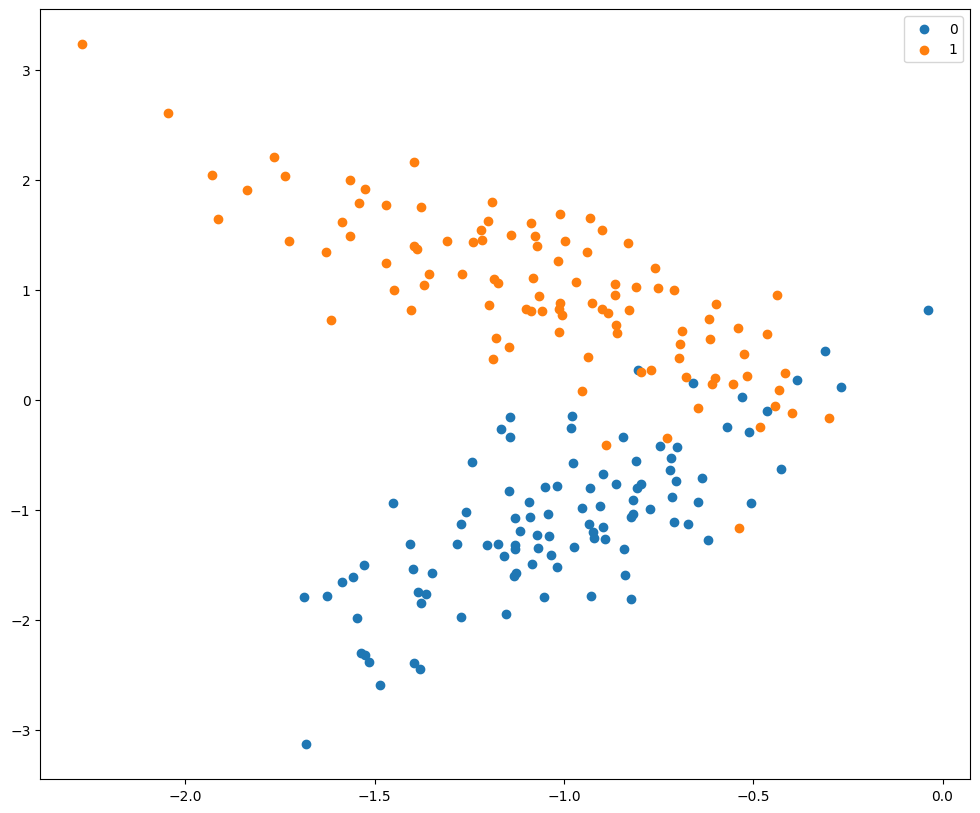

In [30]:
# Scatter plot dataset
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_rand_under.items():
  row_ix = where(y_rand_under == label)[0]
  pyplot.scatter(X_rand_under[row_ix, 0], X_rand_under[row_ix, 1], label=str(label))
  pyplot.legend()
pyplot.show()

### Near Miss Undersampling

Kumpulan metode undersampling yang memilih sampel berdasarkan jarak sampel kelas mayoritas ke sampel kelas minoritas. Terdapat tiga versi penerapan Near Miss, yaitu:

#### NearMiss-1

Memilih sampel dari kelas mayoritas yang memiliki jarak rata-rata terkecil ke tiga (adjustable) sampel kelas minoritas terdekat.

In [31]:
# Inisiasi undersampler dengan metode Near Miss 1
nearmiss = NearMiss()

# Melakukan resampling
X_nearmiss, y_nearmiss = nearmiss.fit_resample(X, y)

# Melihat distribusi kelas pada dataset
counter_y_nearmiss = Counter(y_nearmiss)
print(counter_y_nearmiss)

Counter({0: 100, 1: 100})


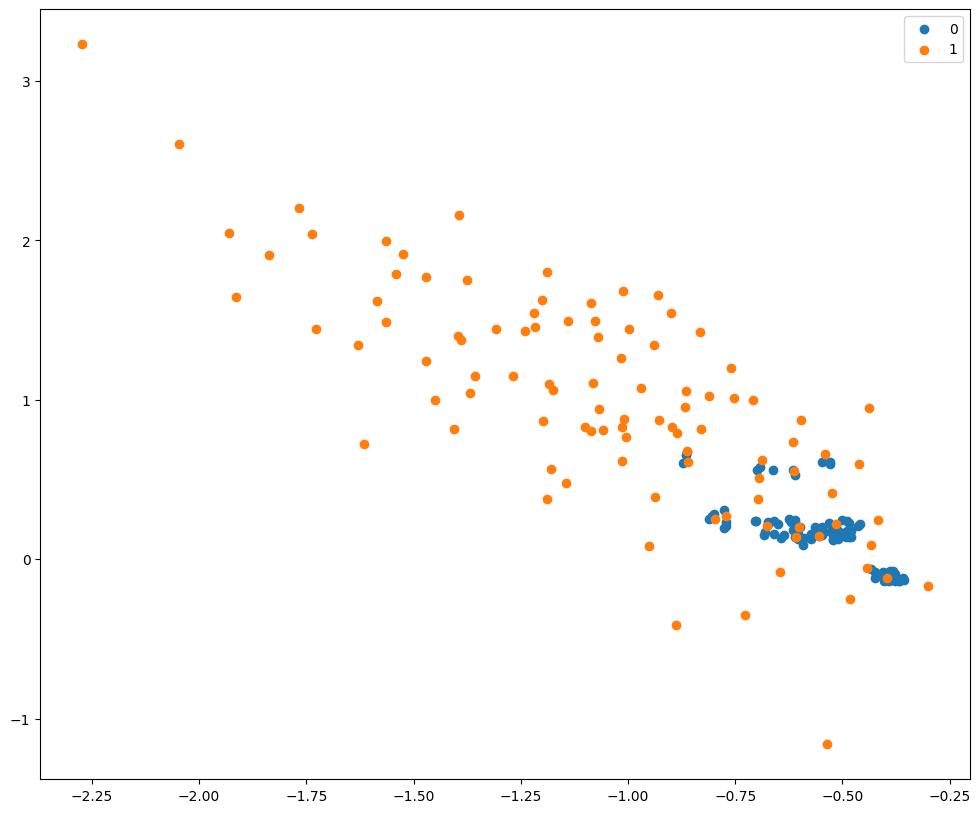

In [32]:
# Scatter plot dataset
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_nearmiss.items():
  row_ix = where(y_nearmiss == label)[0]
  pyplot.scatter(X_nearmiss[row_ix, 0], X_nearmiss[row_ix, 1], label=str(label))
  pyplot.legend()
pyplot.show()

#### NearMiss-2

Memilih sampel dari kelas mayoritas yang memiliki jarak rata-rata terkecil ke tiga (adjustable) sampel kelas minoritas terjauh.

In [33]:
# Inisiasi undersampler dengan metode Near Miss 2
nearmiss2 = NearMiss(version=2)

# Melakukan resampling
X_nearmiss2, y_nearmiss2 = nearmiss2.fit_resample(X, y)

# Melihat distribusi kelas pada dataset
counter_y_nearmiss2 = Counter(y_nearmiss2)
print(counter_y_nearmiss2)

Counter({0: 100, 1: 100})


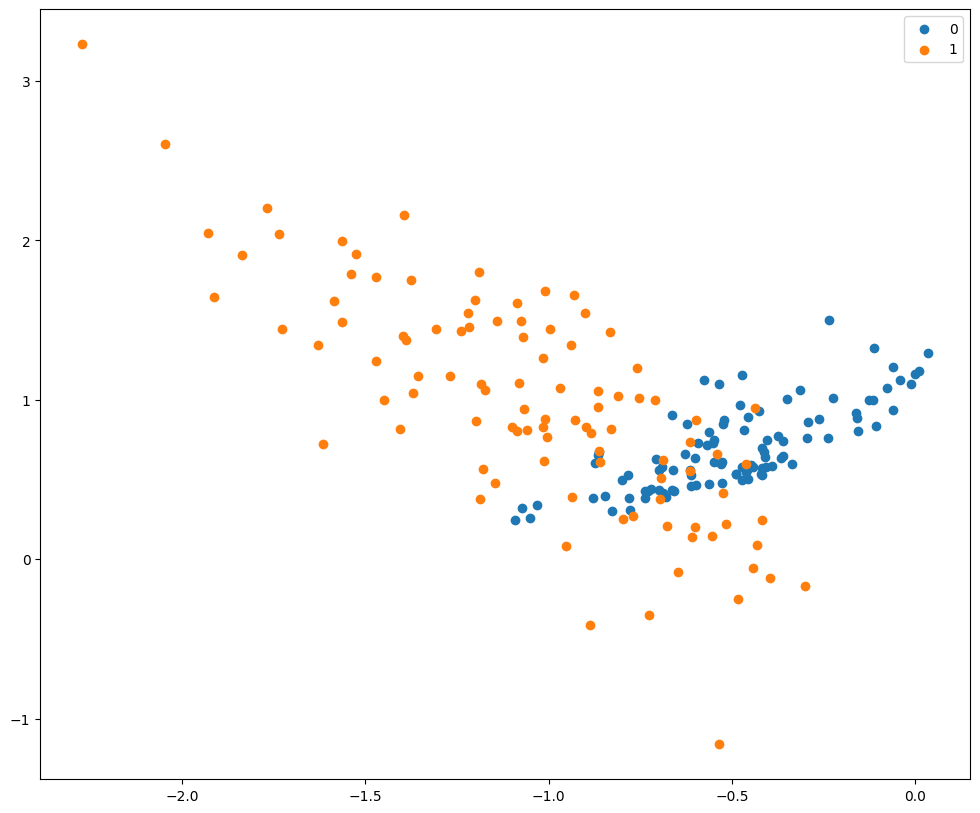

In [34]:
# Scatter plot dataset
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_nearmiss2.items():
  row_ix = where(y_nearmiss2 == label)[0]
  pyplot.scatter(X_nearmiss2[row_ix, 0], X_nearmiss2[row_ix, 1], label=str(label))
  pyplot.legend()
pyplot.show()

#### NearMiss-3

Memilih sampel dari kelas mayoritas yang memiliki jarak rata-rata terkecil ke setiap sampel kelas minoritas.

In [35]:
# Inisiasi undersampler dengan metode Near Miss 3
nearmiss3 = NearMiss(version=3)

# Melakukan resampling
X_nearmiss3, y_nearmiss3 = nearmiss3.fit_resample(X, y)

# Melihat distribusi kelas pada dataset
counter_y_nearmiss3 = Counter(y_nearmiss3)
print(counter_y_nearmiss3)

Counter({1: 100, 0: 92})


c:\Users\notal\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


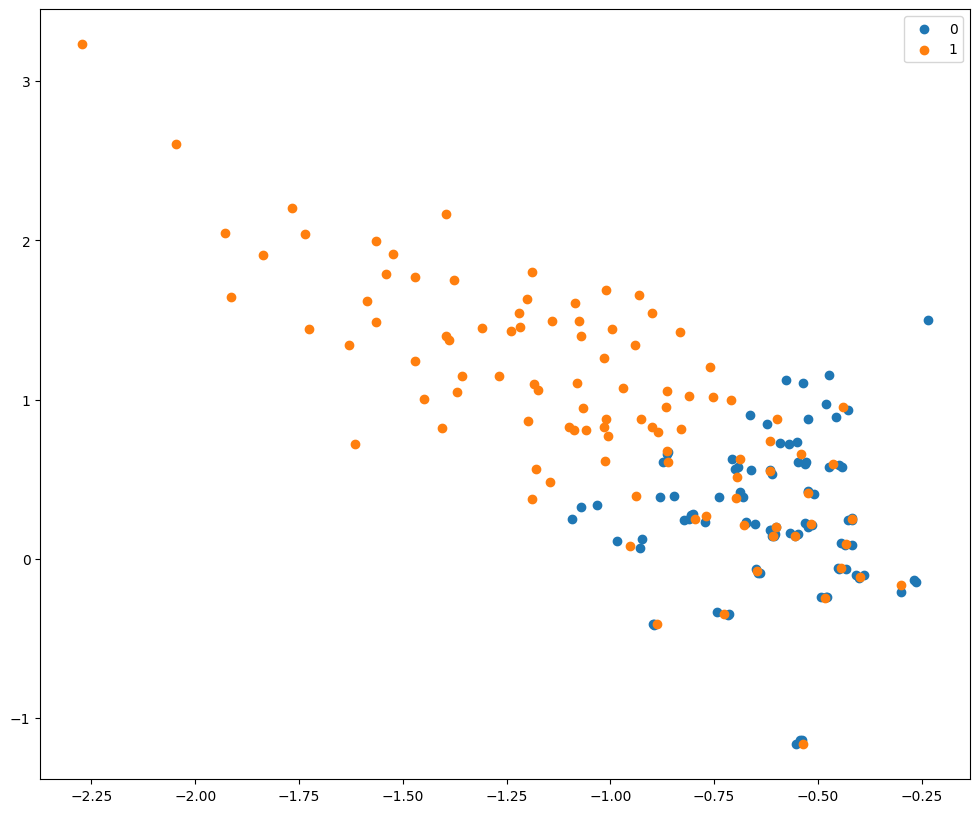

In [36]:
# Scatter plot dataset
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_nearmiss3.items():
  row_ix = where(y_nearmiss3 == label)[0]
  pyplot.scatter(X_nearmiss3[row_ix, 0], X_nearmiss3[row_ix, 1], label=str(label))
  pyplot.legend()
pyplot.show()

### Tomek Link Undersampling

Menghapus sampel kelas mayoritas yang merupakan Tomek Link. Sampel a dan b dikatakan Tomek Link jika: (i) nearest neighbor sampel a adalah b, (ii) nearest neighbor sampel b adalah a, dan (iii) sampel a dan b memiliki kelas yang berbeda.

In [37]:
# Inisiasi undersampler dengan metode Tomek Link
tomek = TomekLinks()

# Melakukan resampling
X_tomek, y_tomek = tomek.fit_resample(X, y)

# Melihat distribusi kelas pada dataset
counter_y_tomek = Counter(y_tomek)
print(counter_y_tomek)

Counter({0: 9882, 1: 100})


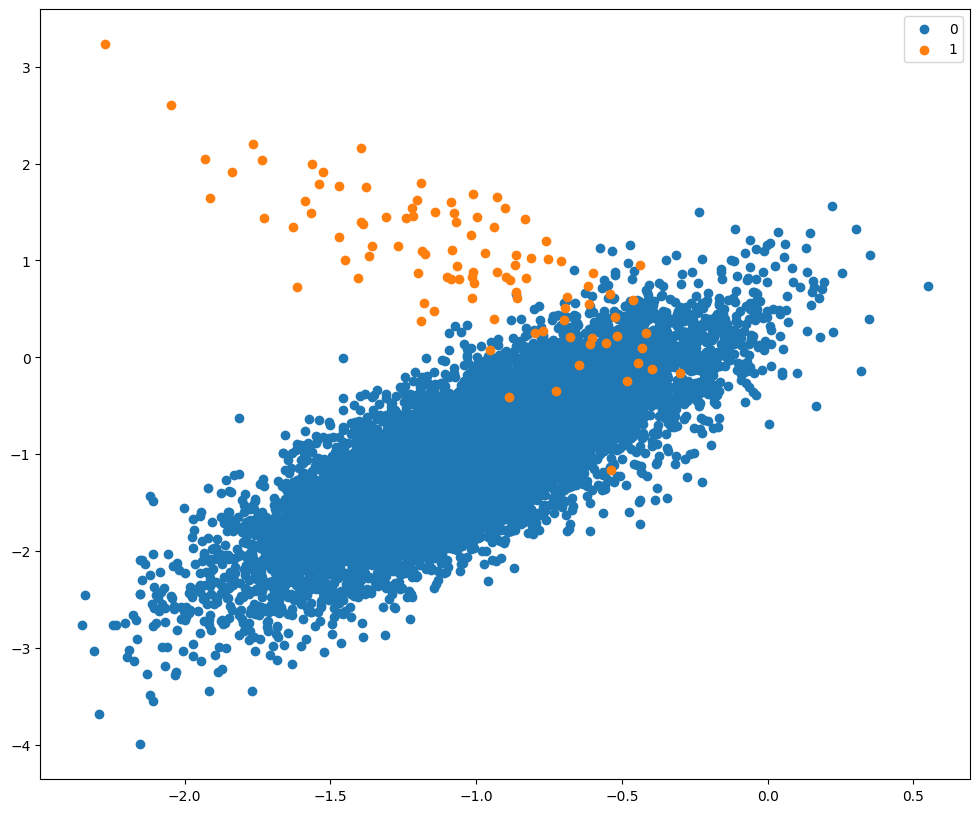

In [38]:
# Scatter plot dataset
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_tomek.items():
  row_ix = where(y_tomek == label)[0]
  pyplot.scatter(X_tomek[row_ix, 0], X_tomek[row_ix, 1], label=str(label))
  pyplot.legend()
pyplot.show()

## Cost Sensitive Learning

Salah satu cara untuk mengatasi permasalahan pada data yang imbalance, kita dapat menggunakan metode *cost sensitive learning*. Sebagian besar algoritma machine learning menganggap bahwa setiap kelas memiliki bobot yang sama, begitu juga dengan bobot kesalahan klasifikasinya. Akan tetapi, dalam banyak kasus, terutama dalam *imbalanced classification*, asumsi ini seringkali tidak berlaku. Misalnya, dalam mendeteksi email spam, mendiagnosis kondisi medis, atau mengidentifikasi penipuan, hasil *false negative* biasanya memiliki konsekuensi yang lebih mahal daripada *false positive*.

Untuk menangani hal tersebut, kita dapat menggunakan *cost matrix*, di mana bobot diberikan kepada kesalahan klasifikasi berdasarkan konsekuensinya. Penentuan bobot ini biasanya melibatkan ahli di bidang yang relevan. Sebagai alternatif, kita juga bisa menggunakan kebalikan dari distribusi kelas sebagai bobot.

Ada tiga kategori utama metode *cost sensitive learning* yang relevan dalam *imbalanced learning*, yaitu *cost sensitive resampling*, *cost sensitive algorithm*, dan *cost sensitive ensembles*. Dalam lab ini, kita akan mencoba menggunakan *cost sensitive algorithm* untuk mengatasi permasalahan *imbalanced classification*. Untuk penjelasan lebih lengkap tentang *cost sensitive learning*, silakan merujuk ke slide kuliah atau sumber lain dari internet.

### Cost Sensitive Decision Tree

Dengan menggunakan model Decision Tree yang pernah Anda pelajari sebelumnya, kita dapat menerapkan *cost sensitive algorithm* sebagai berikut. Mari kita lihat bagaimana performa model biasa pada dataset yang telah digenerate sebelumnya.

In [39]:
decision_tree = DecisionTreeClassifier()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(decision_tree, X, y, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.9937000000000001
f1_macro score: 0.8364723229472162
precision_micro score: 0.9936
precision_macro score: 0.8392298894765006
recall_micro score: 0.9938
recall_macro score: 0.8334343434343434


Selanjutnya, kita akan menerapkan *cost sensitive algorithm* dengan menambahkan bobot pada setiap kelas. Karena pada dataset ini kelas 0 memiliki 9900 sample dan kelas 1 memiliki 100 sample, kita akan menerapkan bobot berkebalikan dengan distribusinya menjadi seperti berikut. Akan tetapi, perlu diperhatikan bahwa mungkin saja pengaturan bobot lain berdampak lebih baik seperti 1:2 dan sebagainya. Bobot yang tidak sesuai seperti terlalu besar pada kelas minoritas dapat menurunkan performa model akibat overfitting pada kelas minoritas.

In [40]:
weights = {0:100, 1:9900}

decision_tree = DecisionTreeClassifier(class_weight=weights)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(decision_tree, X, y, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.9943
f1_macro score: 0.8457648006636855
precision_micro score: 0.9943000000000002
precision_macro score: 0.8939255567737601
recall_micro score: 0.9945
recall_macro score: 0.818939393939394


Perhatikan hasil scorenya, khususnya untuk score macro-nya. Dalam kasus ini, *cost sensitive learning* berhasil memperbaiki sedikit klasifikasi model Decision Tree.

# Neural Network

Neural Network adalah sebuah algoritma umum dalam machine learning yang bekerja secara mirip dengan saraf (neuron) di dalam otak manusia. Multi Layer Perceptron (MLP) adalah salah satu jenis Neural Network yang terdiri dari perceptron yang disusun menjadi beberapa layer. Ilustrasi artificial neuron dalam Neural Network dapat dilihat pada gambar di bawah ini:

<center>
<img src="https://drive.google.com/uc?id=1Si4Jx4AzjOfUAGQQaQcfmJfUNWj_s3GT" alt="Neural Network"/>
</center>


Dalam ilustrasi di atas, kita bisa melihat bahwa tiap perceptron memiliki bobot (atau weight) untuk masing-masing input. Setiap input kemudian akan dikalikan dengan bobotnya dan hasilnya dijumlahkan secara keseluruhan. Selain itu, ada pula nilai bias yang merupakan suatu konstanta. Setelah operasi penjumlahan selesai, hasilnya akan dimasukkan ke dalam fungsi aktivasi (activation function) yang akan menghasilkan keluaran (output). Terdapat beberapa jenis fungsi aktivasi, seperti TanH, ReLU, dan lainnya, yang dapat ditemukan dalam ilustrasi di bawah ini.

![Activation function](https://miro.medium.com/max/1400/1*p_hyqAtyI8pbt2kEl6siOQ.png)

Weight suatu input dan bias didapatkan melalui training terhadap data setelah diinisiasi dengan bilangan random. Weight tersebut lalu akan di-update apabila output tidak sesuai dengan target yang diinginkan. Untuk perhitungan update nilai weight yang lebih detail dapat dilihat dan dipelajari pada slide perkuliahan.

Sumber:
- https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6
- Slide perkuliahan Data Mining 2019
- Slide perkuliahan KASDD 2022

Neural Network dapat digunakan untuk menyelesaikan permasalahan machine learning, termasuk klasifikasi. Kita dapat menggunakan `MLPClassifier` yang telah tersedia pada library `scikit-learn`.

# Pipeline

Setelah memahami teknik oversampling dan undersampling serta melakukan klasifikasi menggunakan Neural Network, kita dapat menggabungkan semua hal tersebut ke dalam sebuah pipeline. Untuk implementasinya, kita akan menggunakan Pipeline dari library `imbalanced-learn`, seperti berikut:

In [41]:
# Membuat classifier MLP
classifier = MLPClassifier(
    alpha=1e-5,
    hidden_layer_sizes=(40,60,20),
    solver='adam',
    random_state=42,
)

# Membuat pipeline
steps = [('over', SMOTE()), ('model', classifier)]
pipeline = Pipeline(steps=steps)

Setelah membuat pipeline, kita dapat mengevaluasi hasil klasifikasi dengan cross-validation. Akan tetapi, kita perlu menggunakan versi yang stratified karena dataset yang imbalance. Mengapa? Silakan pelajari kembali pada slide perkuliahan.

In [42]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(pipeline, X, y, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.9501
f1_macro score: 0.6275467193316169
precision_micro score: 0.9452
precision_macro score: 0.5838544109491945
recall_micro score: 0.9444000000000001
recall_macro score: 0.889090909090909


# Soal

## Deskripsi Dataset

Dataset yang digunakan untuk lab ini adalah dataset yang sama dengan Lab 4, yaitu **Red Wine Quality** (https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) dengan modifikasi.

Dataset ini berisi informasi mengenai atribut-atribut yang dirasa berpengaruh terhadap tinggi atau rendahnya kualitas dari suatu Red Wine yang diukur dengan angka **0 (kualitas rendah)** dan **1 (kualitas tinggi)**.

Atribut-atribut yang terdapat pada dataset ini adalah sebagai berikut:

*   **Fixed Acidity**: Sebagian besar asam yang terlibat dalam anggur adalah asam tetap atau tidak mudah menguap (tidak menguap dengan mudah).
*   **Volatile Acidity**: Jumlah asam asetat dalam anggur, yang pada kadar yang terlalu tinggi dapat menyebabkan rasa cuka yang tidak enak.
*   **Citric Acid**: Ditemukan dalam jumlah kecil, asam sitrat dapat menambahkan 'kesegaran' dan rasa pada anggur.
*   **Residual Sugar**: Jumlah gula yang tersisa setelah fermentasi berhenti.
*   **Chlorides**: Jumlah kadar garam pada wine.
*   **Free Sulfur Dioxide**: Bentuk bebas SO2 ada dalam keseimbangan antara SO2 molekuler (sebagai gas terlarut) dan ion bisulfit.
*   **Total Sulfur Dioxide**: Jumlah bentuk bebas dan terikat dari SO2.
*   **Density**: Kepadatan air tergantung pada persentase alkohol dan kandungan gula.
*   **pH**: Menggambarkan seberapa asam atau basa suatu anggur pada skala dari 0 (sangat asam) hingga 14 (sangat basa).
*   **Sulphates**: Sebuah tambahan untuk anggur yang dapat berkontribusi pada tingkat gas sulfur dioksida (SO2).
*   **Alcohol**: Persentase kandungan alkohol dalam anggur.
*   **is_high_quality**: Variabel keluaran (berdasarkan data sensori, skor 0 atau 1).

In [43]:
# Membuka dataset dan menampilkannya
df = pd.read_csv('./train.csv')
df

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_high_quality
0,56,10.2,0.420,0.57,3.4,0.070,4.0,10.0,0.99710,3.04,0.63,9.6,0
1,1017,8.0,0.180,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,0
2,1364,7.2,0.605,0.02,1.9,0.096,10.0,31.0,0.99500,3.46,0.53,11.8,0
3,1544,8.4,0.370,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,1
4,1419,7.7,0.640,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,1533,8.0,0.390,0.30,1.9,0.074,32.0,84.0,0.99717,3.39,0.61,9.0,0
1275,508,10.0,0.590,0.31,2.2,0.090,26.0,62.0,0.99940,3.18,0.63,10.2,0
1276,1172,9.7,0.420,0.46,2.1,0.074,5.0,16.0,0.99649,3.27,0.74,12.3,0
1277,1027,6.4,0.795,0.00,2.2,0.065,28.0,52.0,0.99378,3.49,0.52,11.6,0


## Data Awal [10]

Pada tahap ini, kita akan melihat distribusi wine yang berkualitas tinggi (`is_high_quality = 1`) dan yang berkualitas rendah (`is_high_quality = 0`).

### a. Ambil data (density & alcohol) untuk X dan data (is_high_quality) untuk y. Jangan lupa untuk memastikan X dan y dalam format **array**. [3]

In [44]:
X = df[['density','alcohol']]
y = df['is_high_quality']

X1 = df[['density','alcohol']].to_numpy()
y1 = df['is_high_quality'].to_numpy()

### b. Hitung jumlah masing-masing target (Hint: Counter) [3]

In [45]:
counter_y1 = Counter(y1)
print(counter_y1)

Counter({0: 1105, 1: 174})


### c. Visualisasikan data [4]

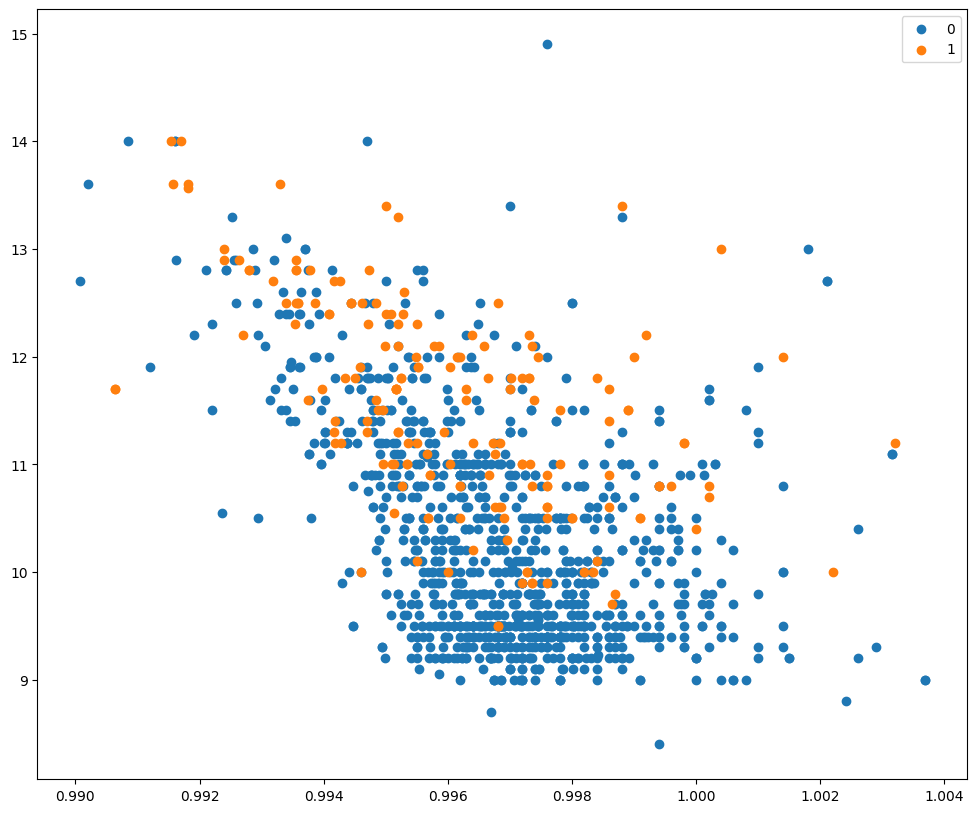

In [46]:
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y1.items():
    row_ix = where(y1 == label)[0]
    pyplot.scatter(X1[row_ix, 0], X1[row_ix, 1], label=str(label))
    pyplot.legend()

## Menerapkan Teknik Oversampling [25]

Pada tahap ini, kita akan mencoba melakukan oversampling pada dataset wine. Silakan pilih dua metode oversampling yang ingin Anda eksplorasi atau mungkin telah Anda kuasai.

### 1. Metode 1: Synthetic Minority Oversampling Technique (SMOTE) [10]

#### a. Lakukan Oversample pada X dan y dengan metode yang Anda pilih. [3]

In [47]:
smote = SMOTE()

# fit and apply the transform
X_smote, y_smote = smote.fit_resample(X1, y1)

#### b. Hitung jumlah (counter) target setelah di-oversample. [3]

In [48]:
counter_y_smote = Counter(y_smote)
print(counter_y_smote)

Counter({0: 1105, 1: 1105})


#### c. Visualisasikan data setelah di-oversample. [4]

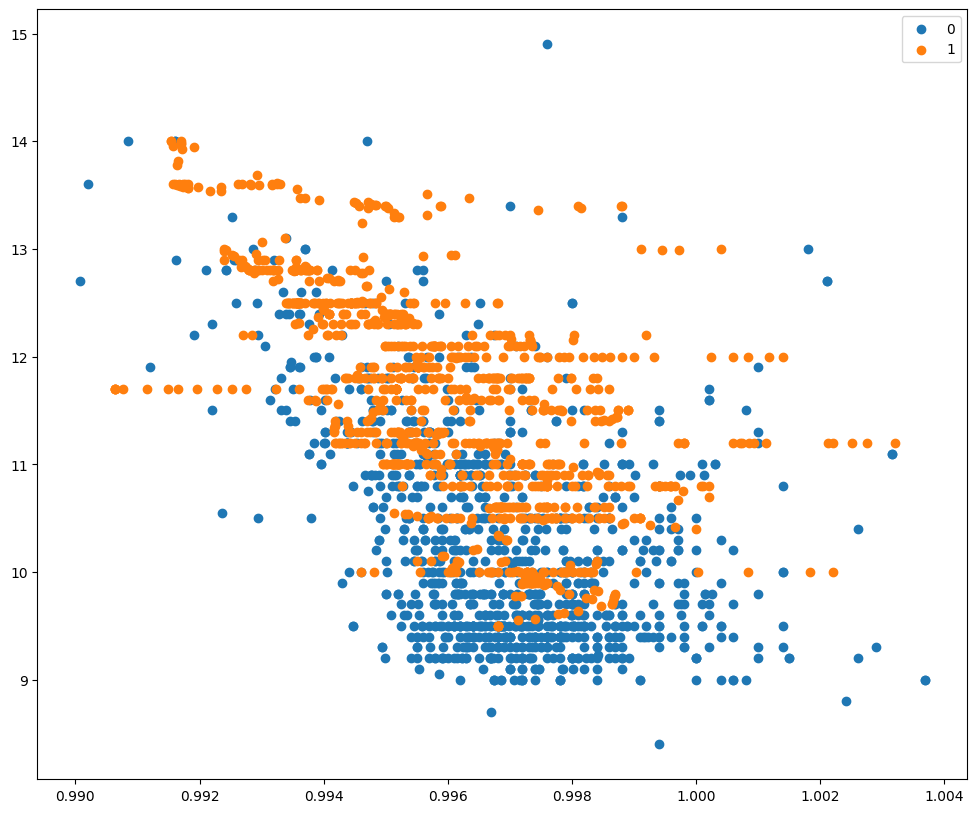

In [49]:
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_smote.items():
    row_ix = where(y_smote == label)[0]
    pyplot.scatter(X_smote[row_ix, 0], X_smote[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()

### 2. Metode 2: Adaptive Synthetic Sampling (ADASYN) [10]

#### a. Lakukan Oversample pada X dan y dengan metode yang Anda pilih. [3]

In [50]:
adasyn = ADASYN()

# fit and apply the transform
X_adasyn, y_adasyn = adasyn.fit_resample(X1, y1)

#### b. Hitung jumlah (counter) target setelah di-oversample. [3]

In [51]:
counter_y_adasyn = Counter(y_adasyn)
print(counter_y_adasyn)

Counter({1: 1123, 0: 1105})


#### c. Visualisasikan data setelah di-oversample. [4]

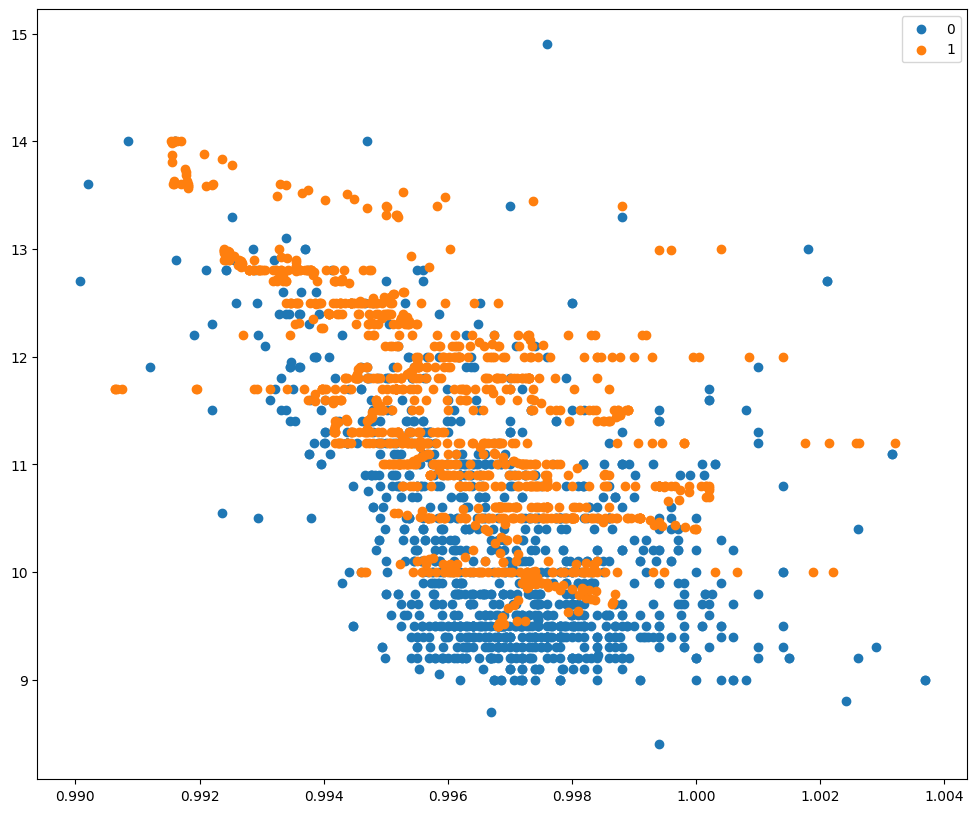

In [52]:
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_adasyn.items():
    row_ix = where(y_adasyn == label)[0]
    pyplot.scatter(X_adasyn[row_ix, 0], X_adasyn[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()

### 3. Adakah perbedaan yang Anda temukan dari pengamatan terhadap data hasil kedua metode oversampling yang Anda pilih? Jelaskan! [5]

Ya, **terdapat perbedaan** data yang terjadi. Dapat dilihat bahwa pada data asli nilai counter (proporsi data mayoritas dengan minoritas) adalah `Counter({0: 1105, 1: 174})` dimana 0 (dengan hasil 1105) menandakan adalah **data mayoritas** dan 1 (dengan nilai 174) adalah **data minoritas**.

Selanjutnya setelah dilakukan 2 metode oversampling, saya dapat melihat perbedaan dari nilai counter dan grafik (walaupun sedikit namun tidak jauh berbeda):

- SMOTE => `Counter({0: 1105, 1: 1105})`
- ADASYN => `Counter({1: 1123, 0: 1105})`

Dapat dilihat pada metode SMOTE, terdapat proporsi yang sama antara data mayoritas dan minoritasnya sama dan tidak terdapat data tambahan. Akan tetapi pada metode ADASYN, dapat dilihat bahwa data minoritas memiliki jumlah data yang **sedikit lebih banyak** dari data mayoritas.

Pada model ADASYN, jumlah sampel sintetis yang dihasilkan untuk kelas minoritas dalam ADASYN bisa berbeda dari jumlah data asli untuk memastikan representasi yang lebih seimbang. Hal ini karena tujuan dari model bukan hanya mencocokkan jumlah kelas mayoritas, tetapi juga menciptakan dataset tambahan yang membantu model mempelajari pola-pola dalam kelas minoritas dengan lebih efektif.

## Menerapkan Teknik Undersampling [25]

Pada tahap ini, kita akan mencoba melakukan undersampling pada dataset wine. Seperti sebelumnya, silakan pilih dua metode undersampling yang ingin Anda eksplorasi atau mungkin telah Anda kuasai.

### 1. Metode 1: Random Undersampling [10]

#### a. Lakukan Undersample pada X dan y dengan metode yang Anda pilih. [3]

In [53]:
undersample = RandomUnderSampler(sampling_strategy='majority')

X_undersample, y_undersample = undersample.fit_resample(X1, y1)

#### b. Hitung jumlah (counter) target setelah di-undersample. [3]

In [54]:
counter_y_undersample = Counter(y_undersample)
print(counter_y_undersample)

Counter({0: 174, 1: 174})


#### c. Visualisasikan data setelah di-undersample. [4]

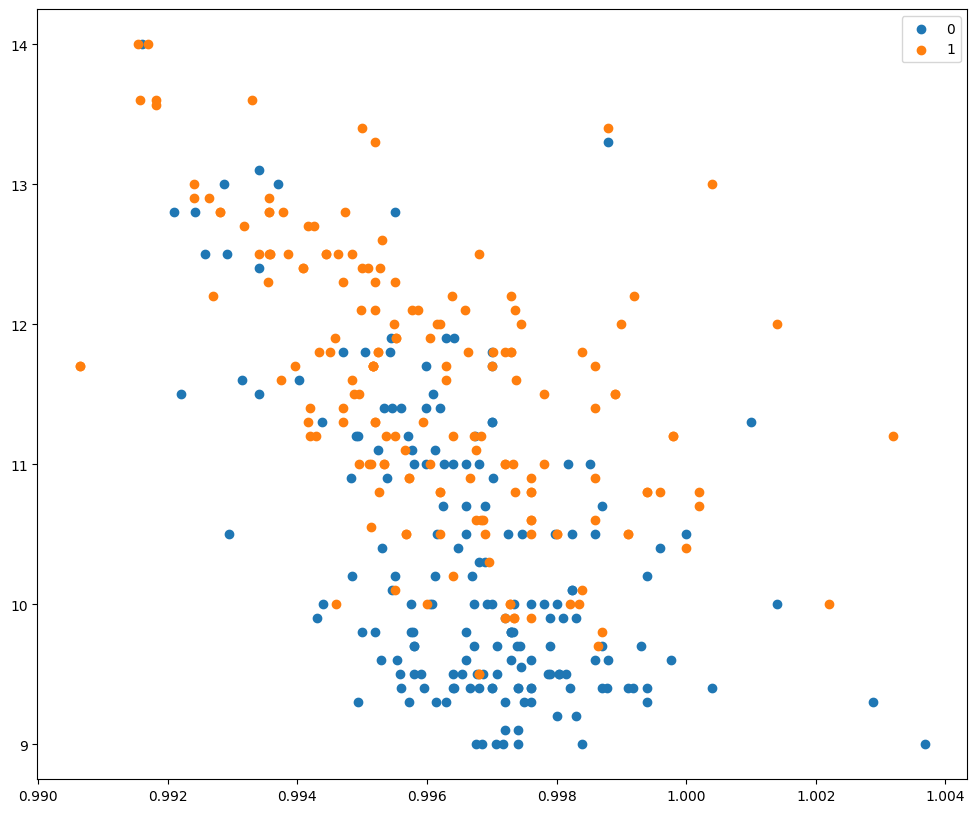

In [55]:
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_undersample.items():
    row_ix = where(y_undersample == label)[0]
    pyplot.scatter(X_undersample[row_ix, 0],
                   X_undersample[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()

### 2. Metode 2: Tomek Link Undersampling [10]

#### a. Lakukan Undersample pada X dan y dengan metode yang Anda pilih. [3]

In [56]:
tomek = TomekLinks()

X_tomek, y_tomek = tomek.fit_resample(X1, y1)

#### b. Hitung jumlah (counter) target setelah di-undersample. [3]

In [57]:
counter_y_tomek = Counter(y_tomek)
print(counter_y_tomek)

Counter({0: 1064, 1: 174})


#### c. Visualisasikan data setelah di-undersample. [4]

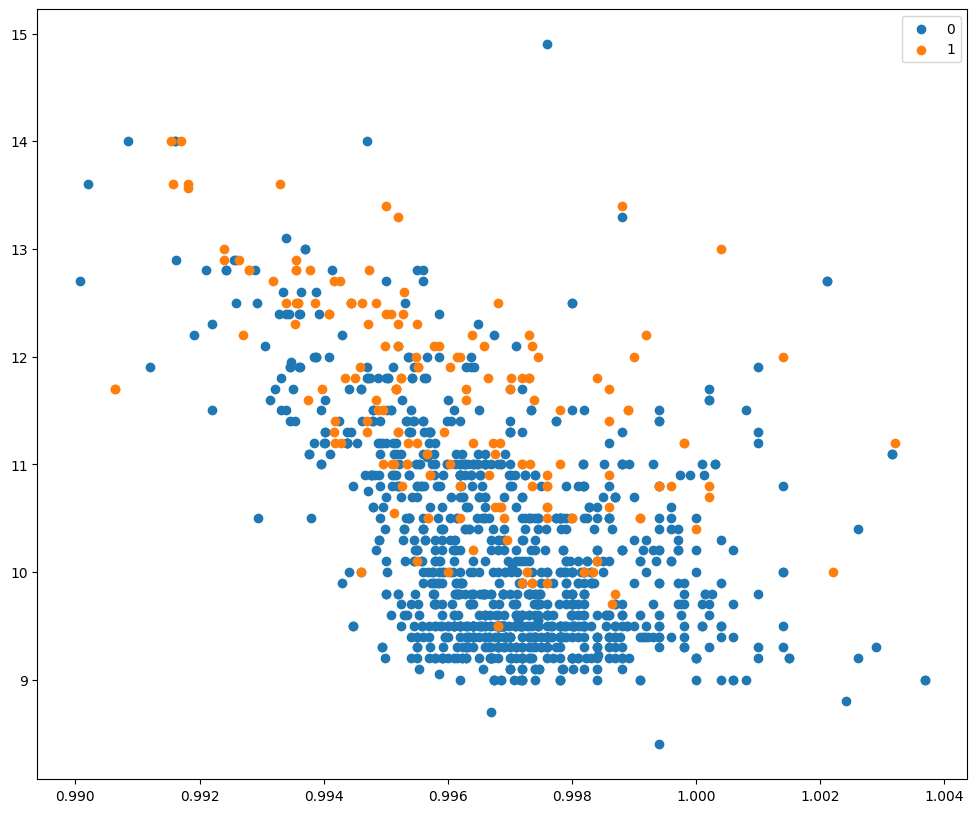

In [58]:
pyplot.figure(figsize=(12, 10))

for label, _ in counter_y_tomek.items():
  row_ix = where(y_tomek == label)[0]
  pyplot.scatter(X_tomek[row_ix, 0], X_tomek[row_ix, 1], label=str(label))
  pyplot.legend()
pyplot.show()

### 3. Adakah perbedaan yang Anda temukan dari pengamatan terhadap data hasil kedua metode undersampling yang Anda pilih? Jelaskan! [5]

Ya, **terdapat perbedaan** yang dapat saya temukan dari pengamatan terhadap data hasil kedua metode undersampling antara Random Undersampling dan Tomek Link Undersamping. Dapat dilihat bahwa proporsi data awal adalah `Counter({0: 1105, 1: 174})` dimana 0 menandakan data mayoritas dan 1 merupakan data minoritas. Setelah dilakukan undersampling 2 model yang kita gunakan (mengurangi jumlah mayoritas data) diperoleh:

Random undersampling: `Counter({0: 174, 1: 174})`
Tomek Link undersampling: `Counter({0: 1063, 1: 174})`

Dapat dilihat bahwa pada random undersampling, jumlah mayoritas data **berjumlah sama** dengan jumlah minoritas data karena model ini  memilih mayoritas data secara random dan menghapusnya. Akan tetapi pada tomek link undersampling data mayoritas yang merupakan tomek link saja yang dibuang. Hal ini berarti terdapat 42 tomek link didalam data yang menyebabkan data tersebut dibuang pada model ini.

## Melakukan klasifikasi dengan Cost Sensitive Learning [10]

Pada tahap ini, silakan melakukan klasifikasi menggunakan Decision Tree yang telah diterapkan *cost sensitive algorithm*. Perhatikan bahwa data yang harus digunakan adalah data awal sebelum sampling.

### Tanpa *cost sensitive learning* [4]

#### a. Buatlah model Decision Tree Classifier. [2]

In [59]:
decision_tree = DecisionTreeClassifier()

#### b. Evaluasi menggunakan stratified k-fold (`n_splits = 5`) dan tampilkan metrik evaluasi berupa F1-Score, Precision, dan Recall. Anda boleh menggunakan pipeline ataupun tidak. [2]

In [60]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']

for i in range(len(scoring)):
  score = cross_val_score(decision_tree, X1, y1, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.8444209558823529
f1_macro score: 0.665043495053865
precision_micro score: 0.8444148284313725
precision_macro score: 0.6711285476090936
recall_micro score: 0.8467616421568627
recall_macro score: 0.6697608274078861


### Dengan *cost sensitive learning* [4]

Silakan eksplorasi mengenai bobot yang baik untuk meningkatkan performa model Decision Tree.

#### a. Buatlah model Decision Tree Classifier lakukan prediksi pada data awal sebelum sampling. [2]

In [61]:
weights = {0:1, 1:1}

decision_tree = DecisionTreeClassifier(class_weight=weights)

#### b. Evaluasi menggunakan stratified k-fold (`n_splits = 5`) dan tampilkan metrik evaluasi berupa F1-Score, Precision, dan Recall. Anda boleh menggunakan pipeline ataupun tidak. [2]

In [62]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(decision_tree, X1, y1, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.8483272058823529
f1_macro score: 0.6661075176917045
precision_micro score: 0.8459803921568627
precision_macro score: 0.6737768440549732
recall_micro score: 0.8451960784313725
recall_macro score: 0.6657724628312863


### Berikan analisis Anda mengenai dampak *cost sensitive learning* terhadap hasil klasifikasi model Decision Tree Classifier dan alasannya! [2]

Berdasarkan percobaan saya dengan membandingkan beberapa *weights*, hasil terbaik adalah weights dengan nilai 1 untuk label 0 dan 1 untuk label 1. Hal ini artinya bobot dari kelas mayoritas dan kelas minoritas dianggap sama.
Hal ini sangat berguna dalam skenario ketika terdapat *imabalance* pada kelas yang signifikan, memastikan bahwa klasifikasi tidak terlalu berpihak pada kelas mayoritas dan mengabaikan kelas minoritas.

Berbeda dengan Decision Tree Classifier yang tidak menggunakan const sensitive learning, semua sampel dianggap sama pada konstruksi *tree*. Akan tetapi pada dataset yang *imabalanced*, tanpa menyebutkan *weights* yang digunakan, model ini dapat saja memihak pada kelas mayoritas untuk meningkatkan performa.

Berdasarkan hasil diatas, hal yang dapat saya mengerti adalah pada dataset ini, ternyata lebih baik untuk menganggap kelas mayoritas dan kelas minoritas sebagai kelas yang sama pentingnya.

## Melakukan klasifikasi dengan NN [30]

Pada tahap ini, kita akan mencoba melakukan klasifikasi dengan classifier yang mengimplementasikan Neural Network, yaitu MLPClassifier. Untuk setiap case, buatlah 3 model dengan spesifikasi yang diperintahkan.

### Klasifikasi pada data awal [10]

#### Case 1 [3]

##### a. Buatlah MLPClassifier yang memiliki 1 hidden layer berukuran 100 dengan fungsi aktivasi ReLU. [1]

In [63]:
classifier_relu = MLPClassifier(solver='sgd', alpha=1e-5, random_state=42,
                           hidden_layer_sizes=(100), max_iter=200,
                           learning_rate_init=0.01, activation='relu')

##### b. Evaluasi menggunakan stratified k-fold (`n_splits = 5`) dan tampilkan metrik evaluasi berupa F1-Score, Precision, dan Recall. Anda boleh menggunakan pipeline ataupun tidak. [2]

In [64]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']

for i in range(len(scoring)):
  score = cross_val_score(classifier_relu, X1, y1, scoring=scoring[i], cv=kfold, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.8608241421568629
f1_macro score: 0.46260198602557223
precision_micro score: 0.8608241421568626
precision_macro score: 0.43176682131185806
recall_micro score: 0.8608241421568626
recall_macro score: 0.4981900452488688


#### Case 2 [3]

##### a. Buatlah MPLClassifier yang memiliki 3 hidden layer yang secara berurutan memiliki ukuran 100, 200, dan 20 dengan fungsi aktivasi tanh. [1]

In [65]:
classifier_tanh = MLPClassifier(solver='sgd', alpha=1e-5, random_state=42,
                           hidden_layer_sizes=(100, 200, 20), max_iter=200,
                           learning_rate_init=0.01, activation='tanh')

##### b. Evaluasi menggunakan stratified k-fold (`n_splits = 5`) dan tampilkan metrik evaluasi berupa F1-Score, Precision, dan Recall. Anda boleh menggunakan pipeline ataupun tidak. [2]

In [66]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']

for i in range(len(scoring)):
  score = cross_val_score(classifier_tanh, X1, y1, scoring=scoring[i], cv=kfold, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.8584865196078433
f1_macro score: 0.48504274578366086


precision_micro score: 0.8584865196078433
precision_macro score: 0.5561328808451037
recall_micro score: 0.8584865196078433
recall_macro score: 0.5088558500323206


#### Case 3 [4]

##### a. Buatlah MPLClassifier dengan performa sebaik mungkin, khususnya dalam metrik macro. Sama dengan model umumnya, MLPClassifier juga dapat dituning menggunakan GridSearchCV. Silakan mereview Lab 4 atau 5 jika lupa cara mengimplementasikannya, ya! [2]

> Hyperparamter Tuning

In [67]:
mlp = MLPClassifier()

parameter_space = {
    'hidden_layer_sizes': [(50,50), (50,100,50), (100,), (50, 75, 20)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.01, 0.001],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [200, 400]
}

clf = GridSearchCV(mlp, parameter_space, scoring='f1_macro', n_jobs = -1)

clf.fit(X, y)

GridSearchCV(estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'alpha': [0.01, 0.001],
                         'hidden_layer_sizes': [(50, 50), (50, 100, 50), (100,),
                                                (50, 75, 20)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [200, 400], 'solver': ['sgd', 'adam']},
             scoring='f1_macro')

> Cetak konfigurasi hyperparameter terbaik, kemudian buatlah MPLClassifier dengan hyperparameter tersebut.

In [68]:
print('Konfigurasi hyperparameter terbaik:', clf.best_params_)

Konfigurasi hyperparameter terbaik: {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01, 'max_iter': 200, 'solver': 'adam'}


##### b. Evaluasi menggunakan stratified k-fold (`n_splits = 5`) dan tampilkan metrik evaluasi berupa F1-Score, Precision, dan Recall. Anda boleh menggunakan pipeline ataupun tidak. [2]

In [69]:
best_mlp_classifier = MLPClassifier(**clf.best_params_)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']

for i in range(len(scoring)):
  score = cross_val_score(best_mlp_classifier, X1, y1, scoring=scoring[i], cv=kfold, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.8639460784313725
f1_macro score: 0.5158102651845553
precision_micro score: 0.8616053921568627
precision_macro score: 0.642096542977615
recall_micro score: 0.8647303921568626
recall_macro score: 0.5384744667097608


### Klasifikasi pada data yang telah di-undersample [10]

Pada tahap ini, silakan pilih salah satu metode yang telah Anda pilih sebelumnya pada tahap Menerapkan Teknik Undersampling.

> Saya menggunakan metode Tomek Link Undersampling

#### Case 1 [3]

##### a. Dengan spesifikasi yang sama dengan data awal Case 1, definisikan MLPClassifier dan pipeline (wajib). [1]

In [70]:
classifier_relu = MLPClassifier(solver='sgd', alpha=1e-5, random_state=42,
                    hidden_layer_sizes=(100), max_iter=200,
                    learning_rate_init=0.01, activation='relu')

# Membuat pipeline
steps = [('over', TomekLinks()), ('model', classifier_relu)]
pipeline = Pipeline(steps=steps)

##### b. Evaluasi pipeline menggunakan stratified k-fold (`n_splits = 5`) dan tampilkan metrik evaluasi berupa F1-Score, Precision, dan Recall. [2]

In [71]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(pipeline, X_tomek, y_tomek, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.8513810891994253
f1_macro score: 0.576740037356003
precision_micro score: 0.8513810891994253
precision_macro score: 0.7108698343729607
recall_micro score: 0.8513810891994253
recall_macro score: 0.588569798368457


#### Case 2 [3]

##### a. Dengan MLPClassifier data awal Case 2, definisikan pipeline (wajib). [1]

In [72]:
classifier_tanh = MLPClassifier(solver='sgd', alpha=1e-5, random_state=42,
                           hidden_layer_sizes=(100, 200, 20), max_iter=200,
                           learning_rate_init=0.01, activation='tanh')

# Membuat pipeline
steps = [('over', TomekLinks()), ('model', classifier_tanh)]
pipeline = Pipeline(steps=steps)

##### b. Evaluasi pipeline menggunakan stratified k-fold (`n_splits = 5`) dan tampilkan metrik evaluasi berupa F1-Score, Precision, dan Recall. [2]

In [73]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']

for i in range(len(scoring)):
  score = cross_val_score(pipeline, X_tomek, y_tomek, scoring=scoring[i], cv=kfold, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.8618747551260284
f1_macro score: 0.5646761215037707
precision_micro score: 0.8618747551260284
precision_macro score: 0.7126466524868764
recall_micro score: 0.8618747551260284
recall_macro score: 0.5587918781650316


#### Case 3 [4]

##### a. Sama seperti data awal, buatlah MPLClassifier dengan performa sebaik mungkin, khususnya dalam metrik macro. Dengan menggunakan pipeline, silakan lakukan hyperparameter tuning. Silakan eksplorasi bagaimana cara hyperparameter tuning pada pipeline! [2]

> Hyperparameter Tuning

In [74]:
mlp = MLPClassifier()

parameter_space = {
    'hidden_layer_sizes': [(50,50), (50,100,50), (100,), (50, 75, 20)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.01, 0.001],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [200, 400]
}

clf_undersampled = GridSearchCV(mlp, parameter_space, scoring='f1_macro', n_jobs = -1)

clf_undersampled.fit(X_tomek, y_tomek)

GridSearchCV(estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'alpha': [0.01, 0.001],
                         'hidden_layer_sizes': [(50, 50), (50, 100, 50), (100,),
                                                (50, 75, 20)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [200, 400], 'solver': ['sgd', 'adam']},
             scoring='f1_macro')

> Cetak konfigurasi hyperparameter terbaik, kemudian buatlah MPLClassifier dengan hyperparameter tersebut serta definisikan pipeline (wajib).

In [75]:
print('Konfigurasi hyperparameter terbaik:', clf_undersampled.best_params_)

best_mlp_undersampled_classifier = MLPClassifier(**clf_undersampled.best_params_)

steps = [('over', TomekLinks()), ('model', best_mlp_undersampled_classifier)]
pipeline = Pipeline(steps=steps)

Konfigurasi hyperparameter terbaik: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.1, 'max_iter': 200, 'solver': 'adam'}


##### b. Evaluasi pipeline menggunakan stratified k-fold (`n_splits = 5`) dan tampilkan metrik evaluasi berupa F1-Score, Precision, dan Recall. [2]

In [76]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']

for i in range(len(scoring)):
  score = cross_val_score(pipeline, X_tomek, y_tomek, scoring=scoring[i], cv=kfold, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.863497453310696
f1_macro score: 0.4905404924850706


precision_micro score: 0.8213987201253754
precision_macro score: 0.6018181416946186
recall_micro score: 0.8271091811414392
recall_macro score: 0.562023398251142


### Pertanyaan dan Analisis hasil klasifikasi [10]

#### Dalam membandingkan performa model pada data yang imbalance, manakah yang lebih baik antara metrik micro dan macro? Jelaskan! [5]

> Berdasarkan referensi yang saya baca dan saya pahami, metrik micro dan macro memiliki perbedaan yang cukup signifikan. Metrik micro menghitung jumlah kesalahan secara keseluruhan, sedangkan metrik macro menghitung kesalahan untuk setiap kelas secara terpisah kemudian menghitung rata-ratanya. Hal ini menyebabkan metrik micro lebih baik digunakan untuk dataset yang seimbang, sedangkan metrik macro lebih baik digunakan untuk dataset yang tidak seimbang.

> Sehingga berdasarkan hasil percobaan saya, dapat dilihat bahwa pada data yang imbalance, metrik macro lebih baik digunakan karena dapat menghitung kesalahan untuk setiap kelas secara terpisah kemudian menghitung rata-ratanya. Hal ini menyebabkan metrik macro lebih baik digunakan untuk dataset yang tidak seimbang.

> Oleh karena itu pada imbalanced dataset, dimana hasil dari kelas minoritas lebih penting, maka metrik macro lebih baik digunakan. Akan tetapi apabila kita ingin memaksimalkan performa model secara keseluruhan (lebih akurat/tidak), maka metrik micro lebih baik digunakan.

> Referensi: https://datascience.stackexchange.com/questions/36862/macro-or-micro-average-for-imbalanced-class-problems

#### Berikan hasil analisis Anda setelah mencoba menerapkan klasifikasi pada data awal dan data yang telah di-undersample. Bandingkan skor metrik metrik micro dan macro pada setiap case juga antara data awal dan data yang telah di-undersample. Selain itu, berikan juga analisis Anda mengenai pengaruh hyperparameter MLPClassifier terhadap hasil klasifikasi. [5]

> Pada data awal, belum dilakukan proses sampling (undersampling maupun oversampling) sedangkan pada data yang telah di-undersample dengan model Tomek Link Undersampling, jumlah data mayoritas yang berkurang. Hal ini menyebabkan perbedaan data yang diperoleh. Berikut adalah perbandingan skor metrik micro dan macro pada setiap case juga antara data awal dan data yang telah di-undersample:


##### Case 1 (menggunakan 1 hidden layer berukuran 100 dengan fungsi aktivasi ReLU)

<style>
table {
    width: 100%;
}
th, td {
    text-align: center;
    vertical-align: middle;
}
</style>

<table>
    <thead>
        <tr>
            <th rowspan="2"></th>
            <th colspan="2">F1 Score</th>
            <th colspan="2">Precision</th>
            <th colspan="2">Recall</th>
        </tr>
        <tr>
            <th>Micro</th>
            <th>Macro</th>
            <th>Micro</th>
            <th>Macro</th>
            <th>Micro</th>
            <th>Macro</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Original Data</td>
            <td> 0.8608241421568629 </td>
            <td> 0.46260198602557223 </td>
            <td> 0.8608241421568626 </td>
            <td> 0.43176682131185806 </td>
            <td> 0.8608241421568626 </td>
            <td> 0.4981900452488688 </td>
        </tr>
        <tr>
            <td>Undersampled Data</td>
            <td> 0.8513810891994253 </td>
            <td> 0.576740037356003 </td>
            <td> 0.8513810891994253 </td>
            <td> 0.7108698343729607 </td>
            <td> 0.8513810891994253 </td>
            <td> 0.588569798368457 </td>
        </tr>
    </tbody>
</table>

##### Case 2 (menggunakan 3 hidden layer yang secara berurutan memiliki ukuran 100, 200, dan 20 dengan fungsi aktivasi tanh)

<table>
    <thead>
        <tr>
            <th rowspan="2"></th>
            <th colspan="2">F1 Score</th>
            <th colspan="2">Precision</th>
            <th colspan="2">Recall</th>
        </tr>
        <tr>
            <th>Micro</th>
            <th>Macro</th>
            <th>Micro</th>
            <th>Macro</th>
            <th>Micro</th>
            <th>Macro</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Original Data</td>
            <td> 0.8584865196078433 </td>
            <td> 0.48504274578366086 </td>
            <td> 0.8584865196078433 </td>
            <td> 0.5561328808451037 </td>
            <td> 0.8584865196078433 </td>
            <td> 0.5088558500323206 </td>
        </tr>
        <tr>
            <td>Undersampled Data</td>
            <td> 0.8618747551260284 </td>
            <td> 0.5646761215037707 </td>
            <td> 0.8618747551260284 </td>
            <td> 0.7126466524868764 </td>
            <td> 0.8618747551260284 </td>
            <td> 0.5587918781650316 </td>
        </tr>
    </tbody>
</table>

##### Case 3 (menggunakan hyperparameter tuning)

<table>
    <thead>
        <tr>
            <th rowspan="2"></th>
            <th colspan="2">F1 Score</th>
            <th colspan="2">Precision</th>
            <th colspan="2">Recall</th>
        </tr>
        <tr>
            <th>Micro</th>
            <th>Macro</th>
            <th>Micro</th>
            <th>Macro</th>
            <th>Micro</th>
            <th>Macro</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Original Data</td>
            <td> 0.8639460784313725 </td>
            <td> 0.5158102651845553 </td>
            <td> 0.8616053921568627 </td>
            <td> 0.642096542977615 </td>
            <td> 0.8647303921568626 </td>
            <td> 0.5384744667097608 </td>
        </tr>
        <tr>
            <td>Undersampled Data</td>
            <td> 0.863497453310696 </td>
            <td> 0.4905404924850706 </td>
            <td> 0.8213987201253754 </td>
            <td> 0.6018181416946186 </td>
            <td> 0.8271091811414392 </td>
            <td> 0.562023398251142 </td>
        </tr>
    </tbody>
</table>

Berdasarkan data yang diperoleh, kita dapat melihat bahwa pengaruh undersampling terhadap data awal meningkatkan skor metrik macro secara cukup signifikan. Hal ini merupakan hal yang diinginkan pada dataset yang imbalance karena dapat meningkatkan performa model dimana kelas minoritas memberikan dampak yang signifikan.

Tidak hanya itu, pengaruh hyperparameter pada MLPClassifier terhadap hasil klasifikasi juga dapat dilihat dari beberapa sisi. Pada hyperparameter saya, saya menggunakan jumlah hidden layers yang berbeda dengan case 2, dimana case 2 memiliki hidden layer yang lebih dalam dibandingkan hyperparameter saya dan fungsi aktivasi yang berbeda dari case 1. Sehingga hyperparameter ini dapat berdampak pada pencarian model terbaik pada MLPClassifier. Dapat dilihat bahwa melalui 2 nilai yang unik tersebut, saya dapat memperoleh model yang secara keseluruhan memiliki skor metrik yang lebih baik dibandingkan dengan case 1 dan case 2.

Pengaruh beberapa parameter terhadap hasil klasifikasi adalah sebagai berikut:
- Jumlah Hidden Layers dan Neuron (hidden_layer_sizes): Jumlah dan ukuran dari hidden layers bisa berdampak pada kemampuan model untuk menangkap pola yang kompleks. Jika terlalu sedikit, model mungkin tidak cukup kuat untuk mempelajari representasi yang baik. Namun, terlalu banyak juga bisa menyebabkan overfitting.

- Activation Function (activation): Pemilihan fungsi aktivasi seperti ReLU, logistic, atau tanh mempengaruhi bagaimana informasi mengalir melalui jaringan.

- Solver (atau optimizer): Algoritma optimasi seperti adam atau sgd memengaruhi bagaimana model belajar dari data. Beberapa algoritma lebih cepat daripada yang lain, sementara yang lain bisa lebih baik dalam menangani data yang besar.

- Learning Rate (learning_rate): Besarnya langkah yang diambil oleh optimizer dalam setiap iterasi dapat mempengaruhi konvergensi model. Learning rate yang terlalu besar bisa menyebabkan model melewati minima, sementara yang terlalu kecil bisa membuat proses pelatihan lambat atau terjebak di minima lokal.

Seluruh parameter tersebut dapat berpengaruh terhadap hasil klasifikasi. Oleh karena itu, kita perlu melakukan hyperparameter tuning untuk mencari parameter terbaik yang dapat meningkatkan performa model.

# Eksplorasi [Kaggle Competition](https://www.kaggle.com/t/146d6327e6304bc7a5a3f1d14541227b)

Pada tahap ini, silakan lakukan eskplorasi dalam melakukan klasifikasi pada dataset yang diberikan seperti fitur dan hyperparameter. Perhatikan bahwa Anda hanya diperbolehkan menggunakan MLPClassifier dan melakukan training pada dataset `train.csv`. Apabila hasil prediksi pada `test.csv` pada Kaggle tidak sesuai dengan notebook ini, maka akan dianggap **tidak valid**.

In [79]:

# Note untuk asisten dosen/dosen yang melakukan pengecekan:
# Saya menggunakan dataset "kaggle_train.csv" untuk melakukan training dan "kaggle_test.csv" untuk melakukan prediksi (berbeda dengan instruksi karena sudah ada file train.csv).

df = pd.read_csv('./kaggle_train.csv')

X = df[['density','alcohol']]
y = df['is_high_quality']

X1 = df[['density','alcohol']].to_numpy()
y1 = df['is_high_quality'].to_numpy()

counter_y1 = Counter(y1)
print(counter_y1)

tomek = TomekLinks()

X_tomek, y_tomek = tomek.fit_resample(X1, y1)

counter_y_tomek = Counter(y_tomek)
print(counter_y_tomek)

X_train, X_test, y_train, y_test = train_test_split(X_tomek, y_tomek, test_size = 0.2, stratify=y_tomek, random_state=42)

def normalize(X_train, X_test):
    mean = X_train.mean(axis=0)
    std = X_train.std(axis=0)
    X_train_norm = (X_train - mean) / std
    X_test_norm = (X_test - mean) / std
    return X_train_norm, X_test_norm, mean, std

X_train_norm, X_test_norm, mean_train, std_train = normalize(X_train, X_test)

mlp = MLPClassifier()

parameter_space = {
    'hidden_layer_sizes': [(50,50), (50,100,50), (100,), (100, 10, 20)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.01, 0.001, 0.0001],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [200, 400]
}

clf_undersampled = GridSearchCV(mlp, parameter_space, scoring='f1_macro', n_jobs = -1)

clf_undersampled.fit(X_train_norm, y_train)

print('Konfigurasi hyperparameter terbaik:', clf_undersampled.best_params_)

best_mlp_undersampled_classifier = MLPClassifier(**clf_undersampled.best_params_)

best_mlp_undersampled_classifier.fit(X_train_norm, y_train)

def evaluate_classifier_performance(prediction, y_test):
    print('Accuracy:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

try_predict = best_mlp_undersampled_classifier.predict(X_test_norm)
evaluate_classifier_performance(try_predict, y_test)

kaggle_test = pd.read_csv('./kaggle_test.csv')

X_kaggle = kaggle_test[['density','alcohol']]

X_kaggle_norm = (X_kaggle - mean_train) / std_train

kaggle_predict = best_mlp_undersampled_classifier.predict(X_kaggle_norm)

df_kaggle_test = kaggle_test[['id']].copy()

df_kaggle_test['is_high_quality'] = kaggle_predict

df_kaggle_test.to_csv('kaggle_result.csv', index=False)


Counter({0: 1105, 1: 174})
Counter({0: 1064, 1: 174})


Konfigurasi hyperparameter terbaik: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate_init': 0.01, 'max_iter': 200, 'solver': 'adam'}
Accuracy: 0.8991935483870968
F1 Macro Average: 0.7443826015254587
F1 Micro Average: 0.8991935483870968
Precision Macro Average: 0.831140350877193
Precision Micro Average: 0.8991935483870968
Recall Macro Average: 0.7025486250838363
Recall Micro Average: 0.8991935483870968



c:\Users\notal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
